### About dataset- https://www.kaggle.com/datasets/kreeshrajani/human-stress-prediction/data

“subreddit – post_id – sentence_range – text-label-confidence-social_timestamp” represents the titles for Stress.csv file.

Stress detection is a challenging task, as there are so many words that can be used by people on their posts that can show whether a person is having psychological stress or not. look for datasets that you can use to train a machine learning model for stress detection.

The dataset contains data posted on subreddits related to mental health. This dataset contains various mental health problems shared by people about their life. Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress.

In [ ]:
#import lib
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import seaborn as sns

###EDA

In [ ]:
data = pd.read_csv("/content/Stress.csv")

In [ ]:
data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['social_timestamp'].plot(kind='hist', bins=20, title='social_timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('subreddit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('post_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('sentence_range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='label', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='confidence', y='social_timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['social_timestamp']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('social_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('subreddit')):
  _plot_series(series, series_name, i)
  fig.legend(title='subreddit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('social_timestamp')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['social_timestamp']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('social_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('post_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='post_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('social_timestamp')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['social_timestamp']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('social_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentence_range')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentence_range', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('social_timestamp')
_ = plt.ylabel('label')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


<Axes: xlabel='label', ylabel='count'>

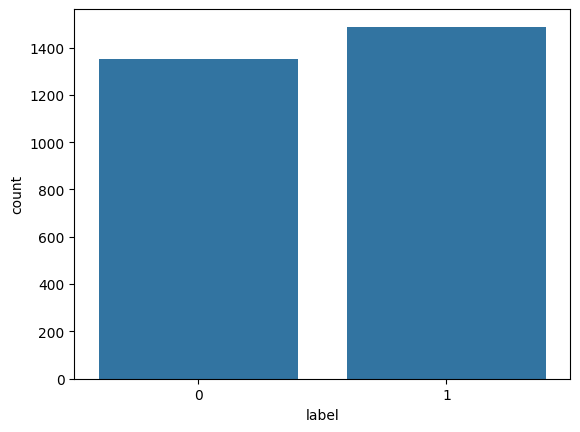

In [ ]:
data["label"].value_counts()
sns.countplot(x=data["label"])

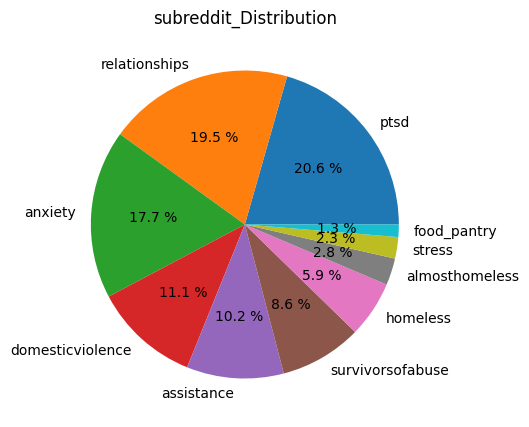

In [ ]:
import matplotlib.pyplot as plt

lst = ['subreddit', 'label']

plt.figure(figsize=(10, 5))

subreddit_counts = data[lst[0]].value_counts()
subreddit_labels = subreddit_counts.index
plt.title(lst[0] + '_Distribution')
plt.pie(x=subreddit_counts, labels=subreddit_labels, autopct="%.1f %%")
plt.show()

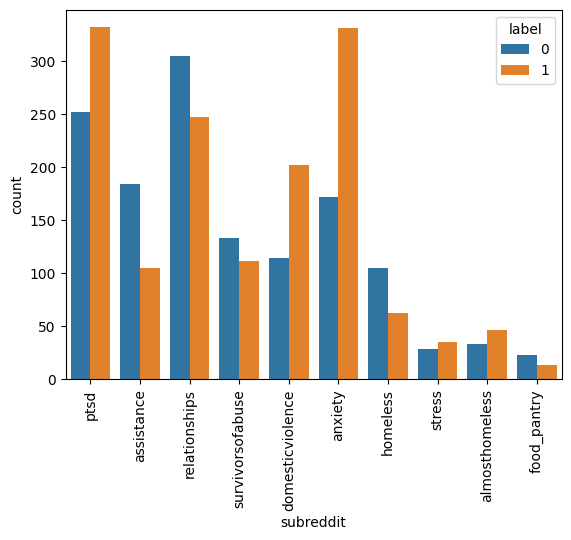

In [ ]:
sns.countplot(data=data, x="subreddit", hue="label")
plt.xticks(rotation=90);

In [ ]:
# text preprocessing

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

# Defining a function to clean the text column
def clean(text):
    text = str(text).lower() #text to lower
    text = re.sub('\[.*?\]', '', text) #removing brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #removing url content
    text = re.sub('<.*?>+', '', text) #removing symbols
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove puntuations
    text = re.sub('\n', '', text) #removing new line char
    text = re.sub('\w*\d\w*', '', text) #removing alphanumeric words
    text = [word for word in text.split(' ') if word not in stopword] #remove stop words
    text = " ".join(text)

    # Applying stemming to each word (removing suffix prefix from word)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

# Applying the 'clean' function to the 'text' column of the 'data' DataFrame
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


###EDA

Average Number of Words: 40.07
Average Number of Characters: 235.62


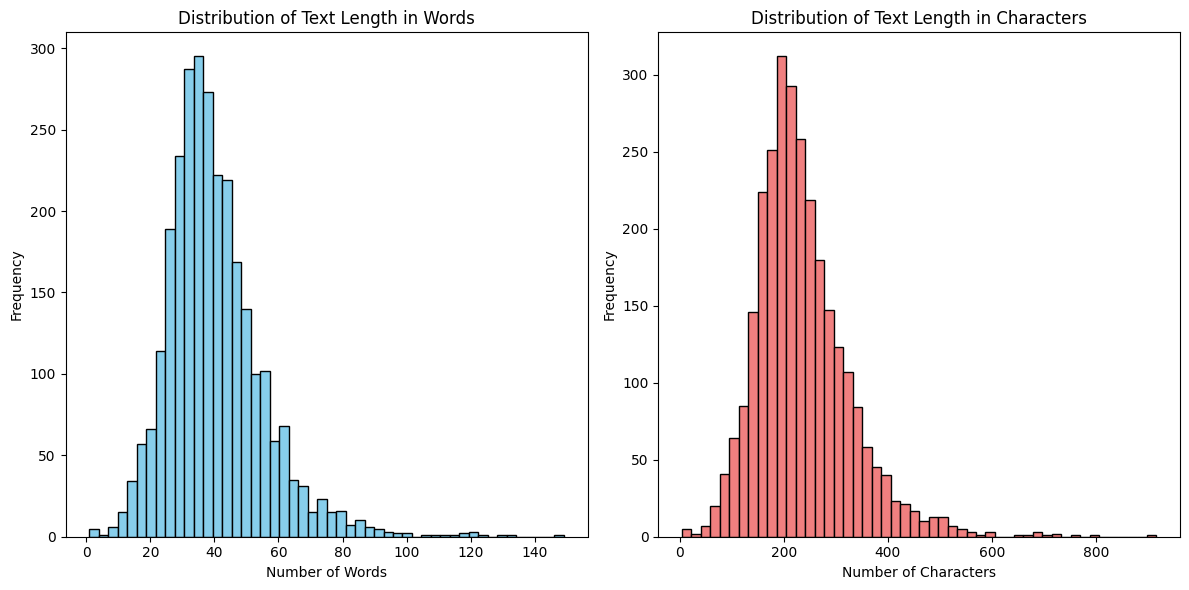

In [ ]:
# Calculate the number of words and characters
data['text_length_words'] = data['text'].apply(lambda x: len(str(x).split()))
data['text_length_chars'] = data['text'].apply(len)

# Calculate average number of words and characters
avg_words = data['text_length_words'].mean()
avg_chars = data['text_length_chars'].mean()

# Print average values
print(f'Average Number of Words: {avg_words:.2f}')
print(f'Average Number of Characters: {avg_chars:.2f}')

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for text length in words
plt.subplot(1, 2, 1)
plt.hist(data['text_length_words'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length in Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for text length in characters
plt.subplot(1, 2, 2)
plt.hist(data['text_length_chars'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Text Length in Characters')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

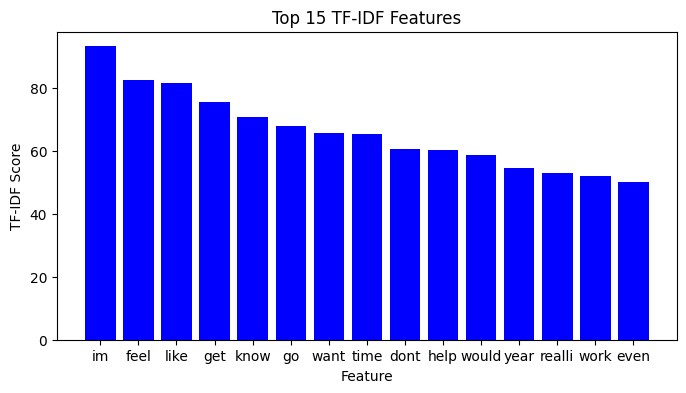

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data['text'].tolist()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum up the TF-IDF scores for each feature across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame with feature names and their TF-IDF scores
tfidf_df = pd.DataFrame({'Feature': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort the DataFrame by TF-IDF scores in descending order
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Plot the top N TF-IDF features
top_n = 15

plt.figure(figsize=(8, 4))
plt.bar(tfidf_df['Feature'][:top_n], tfidf_df['TF-IDF Score'][:top_n], color='blue')
plt.title(f'Top {top_n} TF-IDF Features')
plt.xlabel('Feature')
plt.ylabel('TF-IDF Score')
plt.show()

Text(0.5, 1.0, 'Word Cloud - no-stress')

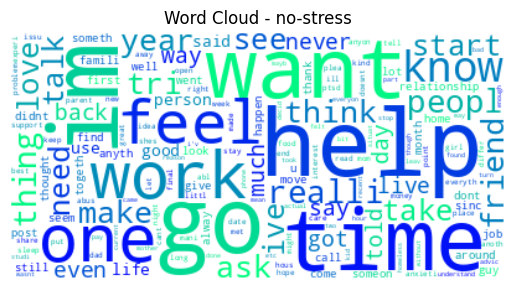

In [ ]:
# Concatenate all text for no-stress label
text_label_0 = data.query('label == 0')['text'].str.cat(sep=' ')

# Create a subplot layout
plt.imshow(WordCloud(background_color="white", colormap='winter').generate_from_text(text_label_0), interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud - no-stress')

Text(0.5, 1.0, 'Word Cloud - no-stress')

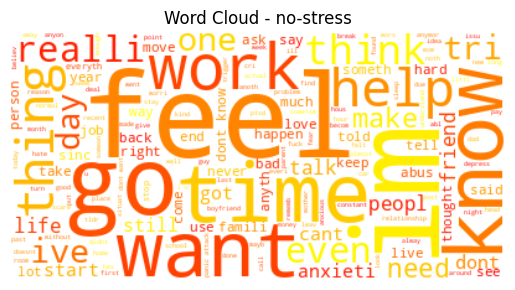

In [ ]:
# Concatenate all text for stress label
text_label_1 = data.query('label == 1')['text'].str.cat(sep=' ')

# Create a subplot layout
plt.imshow(WordCloud(background_color="white", colormap='autumn').generate_from_text(text_label_1), interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud - no-stress')

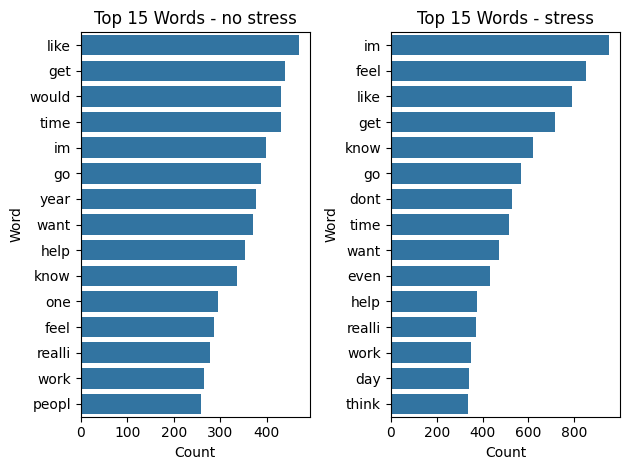

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to count the occurrences of words
vectorizer = CountVectorizer()

# Plot for text_label_0
plt.subplot(1, 2, 1)

word_counts = vectorizer.fit_transform([text_label_0])
words = vectorizer.get_feature_names_out()
counts = word_counts.toarray().flatten()

sorted_words = [word for _, word in sorted(zip(counts, words), reverse=True)]

# Plot top frequency words
top_n = 15
top_words = sorted_words[:top_n]

sns.barplot(x=counts, y=words, order=top_words)
plt.title('Top {} Words - no stress'.format(top_n))
plt.xlabel('Count')
plt.ylabel('Word')

# Plot for text_label_1
plt.subplot(1, 2, 2)

word_counts = vectorizer.fit_transform([text_label_1])
words = vectorizer.get_feature_names_out()
counts = word_counts.toarray().flatten()

sorted_words = [word for _, word in sorted(zip(counts, words), reverse=True)]

# Plot top frequency words
top_n = 15
top_words = sorted_words[:top_n]

sns.barplot(x=counts, y=words, order=top_words)
plt.title('Top {} Words - stress'.format(top_n))
plt.xlabel('Count')
plt.ylabel('Word')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# from textblob import TextBlob

# # Assuming 'data' is your DataFrame with the 'text' column
# data['sentiment'] = data['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# # Create a new column for sentiment labels
# data['sentiment_label'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# # Plotting the sentiment distribution
# plt.figure(figsize=(10, 6))
# data['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
# plt.title('Sentiment Analysis Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.show()

###Classification techniques

In [ ]:
#update data by only taking the necessary columns: the text-input and output- 0,1 (no-stress, stress)
data["new_label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "new_label"]]

print(data.head())

                                                text  new_label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Test train split
x = np.array(data["text"])
y = np.array(data["new_label"])
# CountVectorizer
cv = CountVectorizer()
X_count = cv.fit_transform(x)
# TF-IDF Transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

# Train-test split on TF-IDF transformed data
xtrain, xtest, ytrain, ytest = train_test_split(X_tfidf, y, test_size=0.2, random_state=10)

              precision    recall  f1-score   support

   No Stress       0.78      0.75      0.76       277
      Stress       0.77      0.79      0.78       291

    accuracy                           0.77       568
   macro avg       0.77      0.77      0.77       568
weighted avg       0.77      0.77      0.77       568



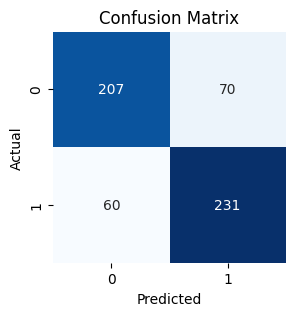

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(xtrain, ytrain)
ypred_lr = model_lr.predict(xtest)

print(classification_report(ytest, ypred_lr))

cm_lr = confusion_matrix(ytest, ypred_lr)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

   No Stress       0.89      0.39      0.54       277
      Stress       0.62      0.95      0.75       291

    accuracy                           0.68       568
   macro avg       0.75      0.67      0.65       568
weighted avg       0.75      0.68      0.65       568



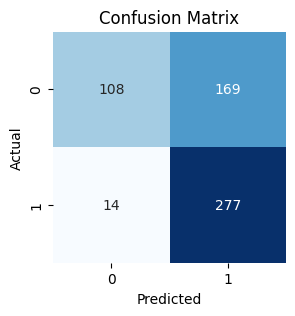

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(xtrain, ytrain)
ypred_nb = model_nb.predict(xtest)

print(classification_report(ytest, ypred_nb))

cm_nb = confusion_matrix(ytest, ypred_nb)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

   No Stress       0.75      0.76      0.75       277
      Stress       0.77      0.76      0.76       291

    accuracy                           0.76       568
   macro avg       0.76      0.76      0.76       568
weighted avg       0.76      0.76      0.76       568



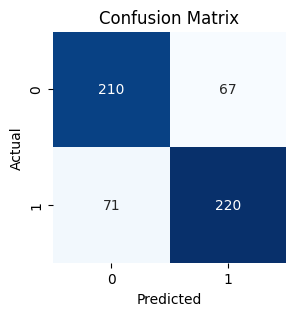

In [ ]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(xtrain, ytrain)
ypred_svm = model_svm.predict(xtest)

print(classification_report(ytest, ypred_svm))

cm_svm = confusion_matrix(ytest, ypred_svm)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

   No Stress       0.67      0.59      0.63       277
      Stress       0.65      0.72      0.68       291

    accuracy                           0.66       568
   macro avg       0.66      0.66      0.65       568
weighted avg       0.66      0.66      0.66       568



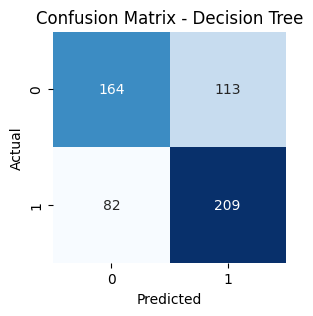

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain, ytrain)
ypred_dt = model_dt.predict(xtest)

print(classification_report(ytest, ypred_dt))

cm_dt = confusion_matrix(ytest, ypred_dt)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

              precision    recall  f1-score   support

   No Stress       0.73      0.55      0.63       277
      Stress       0.65      0.81      0.72       291

    accuracy                           0.68       568
   macro avg       0.69      0.68      0.67       568
weighted avg       0.69      0.68      0.68       568



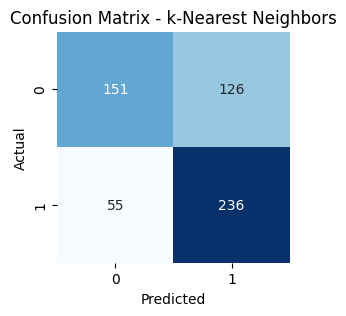

In [ ]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(xtrain, ytrain)
ypred_knn = model_knn.predict(xtest)

print(classification_report(ytest, ypred_knn))

cm_knn = confusion_matrix(ytest, ypred_knn)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - k-Nearest Neighbors")
plt.show()

              precision    recall  f1-score   support

   No Stress       0.77      0.60      0.67       277
      Stress       0.69      0.83      0.75       291

    accuracy                           0.72       568
   macro avg       0.73      0.72      0.71       568
weighted avg       0.73      0.72      0.71       568



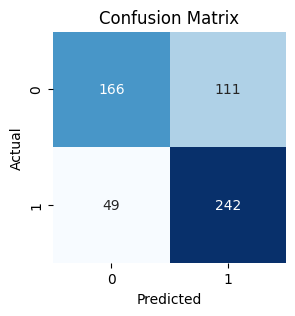

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(xtrain, ytrain)
ypred_rf = model_rf.predict(xtest)

print(classification_report(ytest, ypred_rf))

cm_rf = confusion_matrix(ytest, ypred_rf)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

   No Stress       0.72      0.68      0.70       277
      Stress       0.71      0.75      0.73       291

    accuracy                           0.71       568
   macro avg       0.71      0.71      0.71       568
weighted avg       0.71      0.71      0.71       568



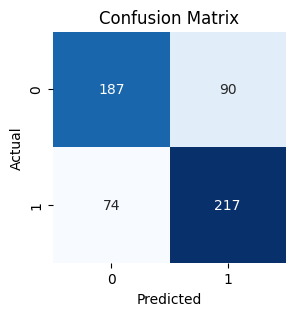

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(xtrain, ytrain)
ypred_gb = model_gb.predict(xtest)

print(classification_report(ytest, ypred_gb))

cm_gb = confusion_matrix(ytest, ypred_gb)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

###Finding the best model

Logistic Regression: 77.11%
Naive Bayes: 67.78%
SVM: 75.70%
Decision Tree: 65.67%
Random Forest: 71.83%
Gradient Boosting: 71.13%
k-Nearest Neighbors: 68.13%


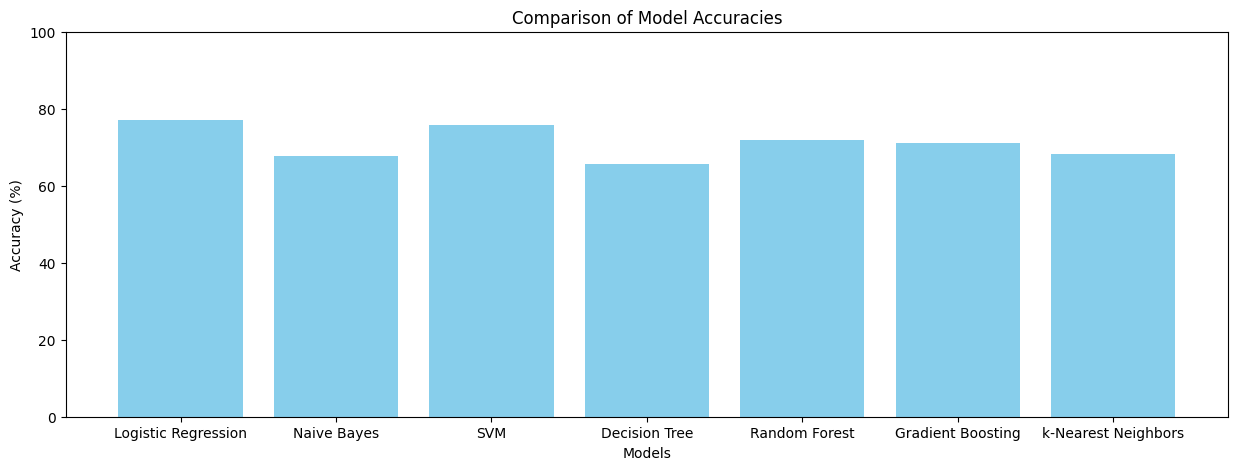

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(ytest, ypred_lr) * 100
accuracy_nb = accuracy_score(ytest, ypred_nb) * 100
accuracy_svm = accuracy_score(ytest, ypred_svm) * 100
accuracy_rf = accuracy_score(ytest, ypred_rf) * 100
accuracy_gb = accuracy_score(ytest, ypred_gb) * 100
accuracy_dt = accuracy_score(ytest, ypred_dt) * 100
accuracy_knn = accuracy_score(ytest, ypred_knn) * 100

models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'k-Nearest Neighbors']

accuracies = [accuracy_lr, accuracy_nb, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_knn]

for model, acc in zip(models, accuracies):
    print(f'{model}: {acc:.2f}%')

# Bar graph
plt.figure(figsize=(15, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 100])
plt.show()

Logistic Regression: 77.10%
Naive Bayes: 64.91%
SVM: 75.71%
Decision Tree: 65.52%
Random Forest: 71.41%
Gradient Boosting: 71.08%
k-Nearest Neighbors: 67.52%


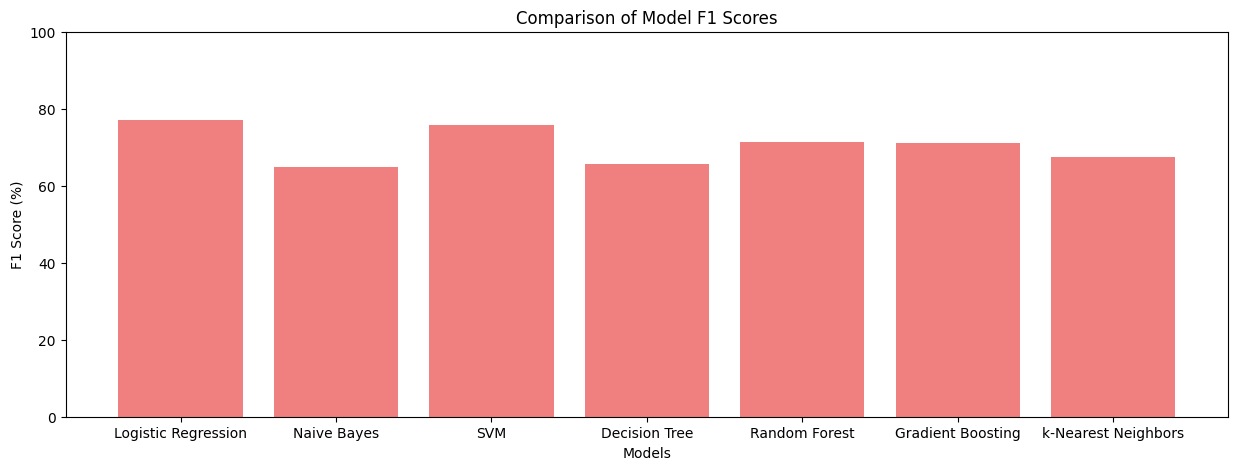

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

f1_lr = f1_score(ytest, ypred_lr, average='weighted') * 100
f1_nb = f1_score(ytest, ypred_nb, average='weighted') * 100
f1_svm = f1_score(ytest, ypred_svm, average='weighted') * 100
f1_rf = f1_score(ytest, ypred_rf, average='weighted') * 100
f1_gb = f1_score(ytest, ypred_gb, average='weighted') * 100
f1_dt = f1_score(ytest, ypred_dt, average='weighted') * 100
f1_knn = f1_score(ytest, ypred_knn, average='weighted') * 100

models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'k-Nearest Neighbors']

f1_scores = [f1_lr, f1_nb, f1_svm, f1_dt, f1_rf, f1_gb, f1_knn]

for model, f1 in zip(models, f1_scores):
    print(f'{model}: {f1:.2f}%')

plt.figure(figsize=(15, 5))
plt.bar(models, f1_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.title('Comparison of Model F1 Scores')
plt.ylim([0, 100])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Choose cross-validation strategy
cross_val_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Evaluate models using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, xtrain, ytrain, cv=cross_val_strategy, scoring='accuracy')
    print(f'{model_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')

# Choose the best model based on cross-validation results
best_model_name = max(models, key=lambda k: np.mean(cross_val_score(models[k], xtrain, ytrain, cv=cross_val_strategy, scoring='accuracy')))
best_model = models[best_model_name]
print(f'\nBest Model: {best_model_name}')

# Train the model on the entire training set
best_model.fit(xtrain, ytrain)

# Evaluate the model on the test set
ypred_best_model = best_model.predict(xtest)

print('\nClassification Report for the Model:')
print(classification_report(ytest, ypred_best_model))

Logistic Regression: 0.7445 (+/- 0.0210)
Naive Bayes: 0.6841 (+/- 0.0159)
SVM: 0.7405 (+/- 0.0221)
Decision Tree: 0.6022 (+/- 0.0185)
Random Forest: 0.7018 (+/- 0.0174)
Gradient Boosting: 0.6987 (+/- 0.0121)
k-Nearest Neighbors: 0.6555 (+/- 0.0184)

Best Model: Logistic Regression

Classification Report for the Model:
              precision    recall  f1-score   support

   No Stress       0.78      0.75      0.76       277
      Stress       0.77      0.79      0.78       291

    accuracy                           0.77       568
   macro avg       0.77      0.77      0.77       568
weighted avg       0.77      0.77      0.77       568



###Testing best model on user input

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'#', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

# Sample user input
user1 = input("Please type a short description of your current thoughts or feelings.\nThis could be about anything that's on your mind right now: ")

# Clean the user input
user1_cleaned = clean(user1)

# Transform the cleaned input using the pre-trained vectorizer and transformer
user1_transformed = cv.transform([user1_cleaned])
user1_tfidf = tfidf_transformer.transform(user1_transformed)

# Predict using the pre-trained classifier
output = best_model.predict(user1_tfidf)

print(output)

KeyboardInterrupt: Interrupted by user

In [ ]:
#stress test

# Struggling with overwhelming workload and constant pressure. Barely keeping up with deadlines, feeling exhausted and anxious. Need a break but can't find the time.
  # Financial troubles are taking a toll. Bills piling up, job insecurity looming, and the future feels uncertain. The stress of making ends meet is overwhelming.
  # Health concerns adding to the stress. Constant worry about symptoms and potential issues. Doctor visits and tests are a source of anxiety. Can not take it anymore.

#no stress test

# Enjoying a quiet evening, sipping tea, and reading a good book. Content with the simplicity of life, finding joy in small pleasures. Grateful for the peaceful moments.
# Weekend plans include leisurely activities – a nature walk, a movie night, and quality time with loved ones. Excited for the upcoming relaxation and fun.
# Reflecting on achievements and positive experiences. Gratitude for a supportive social circle and a fulfilling job. Feeling content with the current state of life.
# Engaged in a hobby, finding joy in creative pursuits. The process is therapeutic, and there's a sense of fulfillment. Stress-free moments spent doing what brings happiness.